In [146]:
import json
import os
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EmotionOptions,EntitiesOptions,KeywordsOptions

natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2018-03-16',
    iam_apikey="kepZR_nmZv1h0iI_q6txlFK0GR7Dj9nWX-2TGGN4R0SN",
    url='https://gateway.watsonplatform.net/natural-language-understanding/api')


collect=[]
direct="C:/Users/Javier/Desktop/Webapp/songs/"

for d in os.listdir(direct):
    print(direct+d)
    
    with open(direct+d, 'r') as myfile:
        data=myfile.read().replace('\n', ' ')

    response = natural_language_understanding.analyze(
        text=data,
        features=Features(
        entities=EntitiesOptions(emotion=True,limit=5),
        keywords=KeywordsOptions(
          emotion=True, limit=5))).get_result()

    max_emotions=[]
    save_dicts=[]
    counts={}

    for v in response:
        if(v=="keywords" or v=="entities"):
            for n in response[v]:
                save_dicts.append(n['emotion'])

    for n in save_dicts:
        max_emotion=(max(n, key=n.get))
        max_emotions.append(max_emotion)

    for emotion in max_emotions:
        if(emotion not in counts):
            counts[emotion]=1
        else:
            counts[emotion]+=1
            
    collect.append(max(counts))

C:/Users/Javier/Desktop/Webapp/songs/caged_bird.txt
C:/Users/Javier/Desktop/Webapp/songs/first_met_you.txt
C:/Users/Javier/Desktop/Webapp/songs/happy_pharrel_williams.txt
C:/Users/Javier/Desktop/Webapp/songs/Hell_on_earth.txt
C:/Users/Javier/Desktop/Webapp/songs/jocelyn_flores.txt
C:/Users/Javier/Desktop/Webapp/songs/let_it_go.txt
C:/Users/Javier/Desktop/Webapp/songs/only_exception.txt
C:/Users/Javier/Desktop/Webapp/songs/the_script.txt
C:/Users/Javier/Desktop/Webapp/songs/t_swift.txt


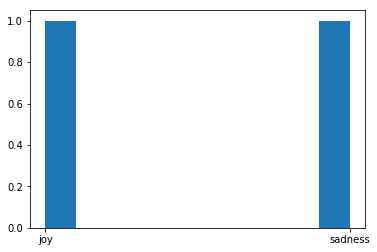

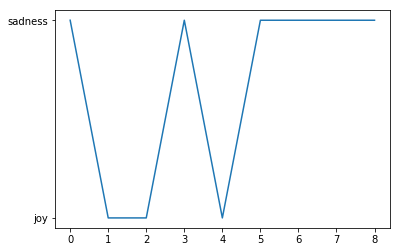

In [174]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

emotions=np.asarray(collect)
plt.hist(emotions)
plt.show()


plt.plot(new_df)
plt.show()


other_df=pd.read_csv("C:/Users/Javier/Desktop/webapp/billboard_lyrics_1964-2015.csv",encoding='latin1')

In [183]:
collect=[]


for d in other_df[:250]["Lyrics"]:
    if(len(d)<=0):
        print("too small.")
        continue

    response = natural_language_understanding.analyze(
        text=d,
        features=Features(
        entities=EntitiesOptions(emotion=True,limit=5),
        keywords=KeywordsOptions(
          emotion=True, limit=5))).get_result()

    max_emotions=[]
    save_dicts=[]
    counts={}

    for v in response:
        if(v=="keywords" or v=="entities"):
            for n in response[v]:
                save_dicts.append(n['emotion'])

    for n in save_dicts:
        max_emotion=(max(n, key=n.get))
        max_emotions.append(max_emotion)

    for emotion in max_emotions:
        if(emotion not in counts):
            counts[emotion]=1
        else:
            counts[emotion]+=1
            
    collect.append(max(counts))    

WatsonApiException: Error: invalid request: content is empty, Code: 400 , X-dp-watson-tran-id: gateway01-534371497 , X-global-transaction-id: 7ecac92c5bde7f9d1fd9dca9

In [178]:
other_df[:2000]

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1.0
6,7,help,the beatles,1965,help i need somebody help not just anybody hel...,3.0
7,8,cant you hear my heart beat,hermans hermits,1965,carterlewis every time i see you lookin my way...,5.0
8,9,crying in the chapel,elvis presley,1965,you saw me crying in the chapel the tears i s...,1.0
9,10,my girl,the temptations,1965,ive got sunshine on a cloudy day when its cold...,3.0
